In [1]:
# Import the Earth Engine Python Package
import ee

# Import Dependencies
import pandas as pd
import matplotlib.dates as mdates
from IPython.display import Image
from datetime import datetime
from matplotlib import dates
from pylab import *

ee.Initialize()

# use matplotlib converters for plotting?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
## define python functions

def UTMzone(shape):
    
        shape.centroid.xy
        # UTM zone and EPSG code calculator
        zone_cal = round((183+self.bbox_large_area_float[0])/6,0)
        EPSG = 32700-round((45+self.bbox_large_area_float[1])/90,0)*100+round((183+self.bbox_large_area_float[0])/6,0)
        self.UTM_EPSG_code ='EPSG:%i'  % (EPSG)
        return self.UTM_EPSG_code

# function to find max value in a dataframe with DateTime column
def find_max(df, index):

    max_value = np.nanmax(df.iloc[:, index])
    
    t_max = df[df.iloc[:, index]  == max_value].DateTime.tolist()[0] 
    
    return max_value, t_max

def water_max_plot(df, name, index, zoom = False):
    
    # calculate max location    
    max_value, t_max = find_max(df, index)
    
    # matplotlib stuff
    plt.figure(num=None, figsize=(16,9), dpi=80, facecolor='w', edgecolor='w')
    ax = plt.subplot(111)
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    if not zoom:
        ax.set_ylim([0, 200000])
        
    plt.grid(alpha = .2)
    register_matplotlib_converters()

    # plot max lines
    plt.axvline(x = t_max, color = 'black',linestyle = '--', alpha = .5, label = 'highes value')
    plt.axhline(y = max_value, alpha = .5, linestyle = '--', label = 'abs max')

    # plot data and running mean
    plt.plot(df.DateTime,df.size_water, 'bo', alpha = .2, label = 'measurements')
    plt.plot(df.DateTime, df.iloc[:, index], color = 'red', label = 'running mean')

    plt.title(' Total water area over time for: ' + name + ' \n' +\
              ' Time at max value: ' + t_max.strftime("%Y-%m-%d"))

    plt.xlabel('Time')
    plt.ylabel('Area')

    plt.legend()
    plt.show()

## create Google Earth Engine functions

# create buffer function
def buffer1k(feature):
    return feature.buffer(500)

def waterfunction(image):
  
    image2 = image  .reproject(crs ='EPSG:4326', scale = SCALE)\
                      .focal_mode()\
                      .focal_max(3).focal_min(5).focal_max(3)\
                      .reproject(crs ='EPSG:4326', scale = SCALE)
                    
  
    # get pixels above the threshold
    water01 = image2.lt(-12)
    # mask those pixels from the image
    image = image.updateMask(water01)
    #  calculate pixelalreas
    area = ee.Image.pixelArea()
    waterArea = water01.multiply(area).rename('waterArea');
    #   add waterarea band to uitput
    image = image.addBands(waterArea)

    return image

# reducer function for area calculation
def setProperty(image):
    dict = image.reduceRegion(ee.Reducer.sum(), AOI_geometry, maxPixels = 60000000)
    return image.set(dict)



# Get number of pixels for point buffers


In [4]:
# define points of interest

features = [
  ee.Feature(ee.Geometry.Point(106.83471,-6.197928), {'name': 'Situ Lembang'}),           # 0  
  ee.Feature(ee.Geometry.Point(106.80394,-6.211232), {'name': 'Waduk Taman Ria Senayan'}),# 1
  ee.Feature(ee.Geometry.Point(106.82223,-6.349455), {'name': 'Situ Mangga Bolong'}),     # 2
  ee.Feature(ee.Geometry.Point(106.82136,-6.314984), {'name': 'Waduk Ragunan'}),          # 3 
  ee.Feature(ee.Geometry.Point(106.82221,-6.343443), {'name': 'Situ Babakan'}),           # 4
  ee.Feature(ee.Geometry.Point(106.84812,-6.257327), {'name': 'Situ TMP Kalibata'}),      # 5
  ee.Feature(ee.Geometry.Point(106.88793,-6.357405), {'name': 'Situ Rawa Dongkal'}),
  ee.Feature(ee.Geometry.Point(106.92210,-6.211445), {'name': 'Situ Rawa Badung'}), 
  ee.Feature(ee.Geometry.Point(106.91205,-6.202781), {'name': 'Situ Rawa Gelam'}), 
  ee.Feature(ee.Geometry.Point(106.88569,-6.338337), {'name': 'Rawa Babon'}),
  ee.Feature(ee.Geometry.Point(106.89472,-6.304803), {'name': 'Situ Rawa TMII'}),
  ee.Feature(ee.Geometry.Point(106.93248,-6.196898), {'name': 'Situ Rawa Penggilingan'}),
  ee.Feature(ee.Geometry.Point(106.95598,-6.163825), {'name': 'Situ Rawa Rorotan'}),
  ee.Feature(ee.Geometry.Point(107.03692,-6.351368), {'name': 'Rawa Burankeng'})
];

## Read shapefile and load to gee

In [4]:
# current working directory
import os
cwd = os.getcwd()
cwd

'/home/chris/Documents/GreenCityWatch/GCW_toolkit/00_get_highest_water_date'

In [103]:
## Read polygons from file and apply as gee geometries
import fiona
from shapely.geometry import shape, MultiPolygon, Polygon
import glob

# current working directory
import os
cwd = os.getcwd()

# find files in shapefile folder
shape_file_path = '../../data/shapefiles_waterbodies_osm/*.shp'
shape_files = glob.glob(shape_file_path)
path = shape_files[0]

shape_files, cwd, path

(['../../data/shapefiles_waterbodies_osm/Indonesia_water_areas.shp',
  '../../data/shapefiles_waterbodies_osm/Cilegon_water_areas.shp',
  '../../data/shapefiles_waterbodies_osm/Denpasar_water_areas.shp',
  '../../data/shapefiles_waterbodies_osm/Jakarta_hand.shp',
  '../../data/shapefiles_waterbodies_osm/Test area CGI.shp',
  '../../data/shapefiles_waterbodies_osm/Balikpapan_water_areas.shp',
  '../../data/shapefiles_waterbodies_osm/Manila_water_areas.shp',
  '../../data/shapefiles_waterbodies_osm/Medan_water_areas.shp',
  '../../data/shapefiles_waterbodies_osm/Jakarta_hand_water.shp',
  '../../data/shapefiles_waterbodies_osm/Shape_Jakarta_003_pansharpen_True_2018-09-13_03:30_1030010085B5FC00.shp',
  '../../data/shapefiles_waterbodies_osm/Cutout_shapes.shp',
  '../../data/shapefiles_waterbodies_osm/Jakarta_water_areas.shp',
  '../../data/shapefiles_waterbodies_osm/Denpasar_hand.shp'],
 '/home/chris/Documents/GreenCityWatch/GCW_toolkit/00_get_highest_water_date',
 '../../data/shapefiles_

In [105]:
shp_AOIs = MultiPolygon([shape(pol['geometry']) for pol in fiona.open(path)]) 
id_list = [pol['id'] for pol in fiona.open(path)]

features = []

for shp_AOI in shp_AOIs:
    # convert data format to usable format for google earth engine api
    x = shp_AOI.exterior.coords.xy[0]
    y = shp_AOI.exterior.coords.xy[1]
    geometry_list = list(np.column_stack((x, y)).flatten())
    
    features.append(ee.Feature(ee.Geometry.MultiPolygon(geometry_list)))




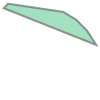

In [8]:
shp_AOIs[10]

In [9]:
# Use folium to visualize the imagery.
# mapid = S1.first().getMapId({
#     'region':rect_JSON,
#     'min':-25,
#     'max':0,
#     'palette':['0784b5', '39ace7', '9bd4e4', 'cadeef', 'ffffff']
# })



In [10]:
len(shp_AOIs)

1936

In [11]:
# print this to use in https://code.earthengine.google.com/ 

# np.column_stack((x, y))

In [12]:
features[1].geometry().getInfo()['type']

'Polygon'

# Collect and plot data

In [47]:
# set variables
SCALE = 10;
polarization = 'VV'; # vertical/vertical or vertical/horizontal

i = 20

no name in feature, get from id_list


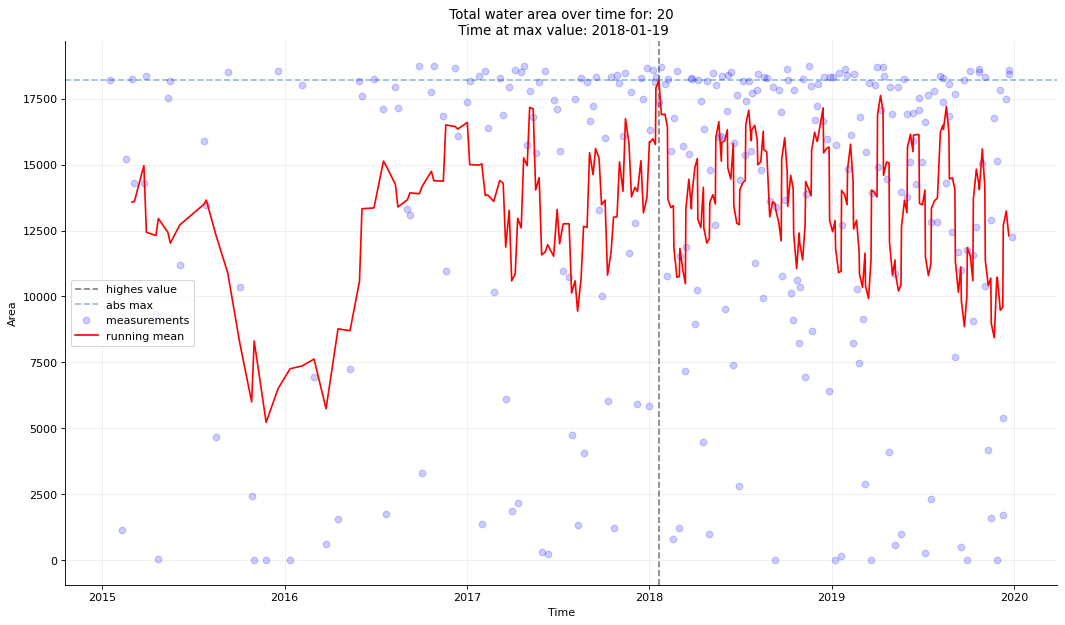

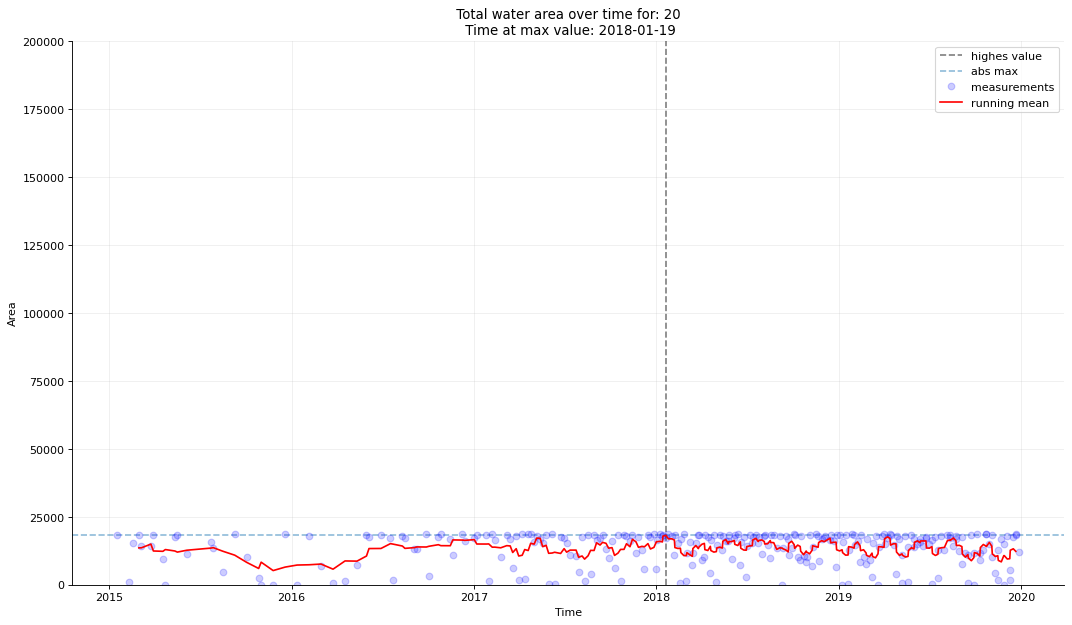

20 2018-01-19 22:45:22.110000


In [48]:
import folium
# for i in [4,4]:

# set water body of interest
waterbody_i = i

#set waterthreshol
waterThreshold = -12; 

try:
    name = features[waterbody_i].getInfo()['properties']['name']
except:
    print('no name in feature, get from id_list')
    name = id_list[waterbody_i]

# if point apply buffer to area of interest otherwise use polygon
if features[0].geometry().getInfo()['type'] == 'Point':
    AOI_geometry = ee.FeatureCollection(features[waterbody_i]).map(buffer1k).geometry()
else: 
    AOI_geometry = features[waterbody_i].geometry()


# apply functions to GEE

# Get the SAR data from the Sentinel-1 collection.
S1 = ee.ImageCollection('COPERNICUS/S1_GRD')\
    .filter(ee.Filter.eq('instrumentMode', 'IW'))\
    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV'))\
    .filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))\
    .filterDate('2015-01-01', '2019-12-30')\
    .filterBounds(AOI_geometry)\
    .select(['VV']);

collection = S1.map(waterfunction);

withSum = collection.map(setProperty)

# get time 
value_time = withSum.aggregate_array('segmentStartTime').getInfo()

# get data 
value_mask_size = withSum.aggregate_array('waterArea').getInfo()

# convert timestamp to DateTime 2016-02-25 05:33:19.610
time = [datetime.datetime.fromtimestamp(int(float(i))/1000) for i in (value_time)]

### Reshape data into Pandas Dataframe
df = pd.DataFrame(data=value_mask_size, index=list(range(len(value_mask_size))),\
                  columns=['size_water'])

df = df.interpolate()
df['DateTime'] = pd.Series(time, index=df.index)

df = df.sort_values('DateTime').reset_index(drop = True)

# remove outliers
df = df[np.abs(df.size_water-df.size_water.mean()) <= (3*df.size_water.std())]

# add running means
df['roll_mean'] = df['size_water'].rolling(window = 6, center = True).mean()

index = 2

water_max_plot(df, name, index, zoom = True)
water_max_plot(df, name, index, zoom = False)    

max_value, t_max = find_max(df, index)





print(name, t_max)


In [49]:
t_max

Timestamp('2018-01-19 22:45:22.110000')

In [50]:
df

,size_water,DateTime,roll_mean
0,18224.954652,2015-01-16 23:00:42.940,NaN
1,1133.914068,2015-02-09 23:00:42.240,NaN
2,15216.479021,2015-02-16 22:52:47.290,NaN
3,18260.635207,2015-02-28 22:52:47.280,13577.296180
4,14307.624019,2015-03-05 23:00:42.480,13600.037230
...,...,...,...
273,5372.759091,2019-12-10 22:52:05.220,12694.806910
274,17508.614611,2019-12-16 22:45:36.420,13240.787091
275,18582.700199,2019-12-21 22:54:01.750,12308.340249
276,18420.214038,2019-12-22 22:52:04.720,NaN


In [90]:
from shapely.geometry import shape

### convert ee.geometry to wkt for use in GBDX
# get geometry from ee
AOI_JSON = AOI_geometry.getInfo() 
# convert to shapely shape
geom = shape(AOI_JSON)

x,y = geom.centroid.xy

In [99]:
# Define the URL format used for Earth Engine generated map tiles.
EE_TILES = 'https://earthengine.googleapis.com/{mapid}/{{z}}/{{x}}/{{y}}?token={token}'

# visualize in leaflet
rect_JSON = AOI_geometry.getInfo()['coordinates']

mapid = collection.select('waterArea').first().getMapId({
    'region':rect_JSON,
    'min':0,
    'max':1,
    'palette':['ffffff','0784b5']
})


m = folium.Map(location=[x,y])

folium.TileLayer(
    tiles = EE_TILES.format(**mapid),
    attr = 'Google Earth Engine',
    overlay = True,
    name ='median composite').add_to(m)

m

In [98]:
mapid

{'mapid': 'projects/earthengine-legacy/maps/a8dd60450c2550a5405b8378c33e0557-988bd74a2a1a6b697ea2e83ddd0f94b2',
 'token': '',
 'tile_fetcher': <ee.data.TileFetcher at 0x7f8ea5042390>,
 'image': <ee.image.Image at 0x7f8ea4c897d0>}

# GBDX integration

In [57]:
index = 1

In [58]:
max_value, t_max = find_max(df, index)

In [59]:
# current working directory
import os
cwd = os.getcwd()

cwd

'/home/chris/Documents/GreenCityWatch/GCW_toolkit/00_get_highest_water_date'

In [60]:
import csv

from gbdxtools.task import env
from gbdxtools import Interface, CatalogImage
import gbdx_auth

# gbdx_auth = gbdx_auth.get_session('/home/chris/.gbdx-config/credentials')

gbdx = Interface()


%matplotlib inline

In [61]:

# convert to wkt
wkt_string = geom.wkt


In [62]:
type(geom.bounds)

tuple

In [63]:
str_ = ', '.join(map(str, geom.bounds))

In [64]:
geom = geom.buffer(0.0003)

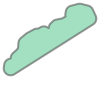

In [65]:
geom

In [66]:
# define filters for GBDX search
filters = [
        "(sensorPlatformName ='WORLDVIEW02' OR sensorPlatformName ='WORLDVIEW03')",
        "cloudCover < 50" # AND coverage > 50"
]

In [67]:
# create search window 
window = 200

search_start = t_max - datetime.timedelta(days = window) 
search_end = t_max + datetime.timedelta(days = window)


str_search_start = search_start.strftime("%Y-%m-%dT%H:%M:%S.%fZ")
str_search_end = search_end.strftime("%Y-%m-%dT%H:%M:%S.%fZ")

print("Start: " + str_search_start + "\nEnd: " + str_search_end)

Start: 2019-06-11T22:45:35.930000Z
End: 2020-07-15T22:45:35.930000Z


In [68]:
t_max

Timestamp('2019-12-28 22:45:35.930000')

## Run search on GBDX

In [69]:
results = gbdx.catalog.search(searchAreaWkt=wkt_string,
                          startDate=str_search_start,
                          endDate=str_search_end,
                          filters=filters)

In [70]:
len(results)

21

In [71]:
from shapely.geometry import MultiPolygon
from shapely.wkt import dumps, loads



In [72]:
i = 0

for result in results:
    image_id = result['identifier']
    cloudCover = result['properties']['cloudCover']
    ordered = CatalogImage.is_available(image_id)
    shape_image = loads(result['properties']['footprintWkt'])
    
    # Get timestamp
    time_image = result["properties"]["timestamp"] 

    # convert timestamp to datetime timestamp format
    time_image = datetime.datetime.strptime(time_image, "%Y-%m-%dT%H:%M:%S.%fZ")

    time_diff = time_image - t_max
    
    overlap_fraction = round(shape_image.intersection(geom).area/geom.area,2)
    
    print(i, image_id, 'cloudcover', cloudCover, 'overlap', overlap_fraction,'time difference', time_diff, 'ordered', ordered)
    
    i = i + 1

0 1030010096902A00 cloudcover 4 overlap 1.0 time difference -150 days +04:00:20.070000 ordered True
1 103001009405FB00 cloudcover 7 overlap 1.0 time difference -172 days +04:10:42.070000 ordered False
2 103001009D11D400 cloudcover 15 overlap 1.0 time difference -33 days +03:52:17.070000 ordered False
3 103001009A36C900 cloudcover 2 overlap 1.0 time difference -85 days +04:06:28.070000 ordered False
4 10300100A1A3BF00 cloudcover 20 overlap 1.0 time difference 21 days 04:03:49.070000 ordered False
5 10300100A0CB6C00 cloudcover 31 overlap 1.0 time difference 5 days 03:51:54.070000 ordered False
6 10300100A56A4200 cloudcover 20 overlap 1.0 time difference 100 days 03:54:05.070000 ordered False
7 103001009F536F00 cloudcover 0 overlap 1.0 time difference 24 days 03:52:55.070000 ordered False
8 10300100A3C98C00 cloudcover 0 overlap 1.0 time difference 111 days 03:47:53.070000 ordered False
9 10300100A4358100 cloudcover 6 overlap 1.0 time difference 103 days 03:42:35.070000 ordered False
10 10

In [77]:
image_id = results[0]['identifier']
catalog_id = env.inputs.get('catalog_id', image_id)
catalog_id

'1030010096902A00'

In [78]:
# get the right bbox for gbdx tools search
bbox = env.inputs.get('bbox', ', '.join(map(str, geom.bounds)))
bbox = env.inputs.get('bbox', bbox)

In [79]:
## Get image from GBDX

# order if not ordered
# otherwise print error and check

order_file_path = '../../data/gbdx_orders/'

try:
    print("Try to get image from GBDX...")
    image = CatalogImage(image_id, bbox=map(float, bbox.split(",")), pansharpen = True)
    
    print("Success")
except:
    
    print("Check if image is ordered... ")
    
    ordered = CatalogImage.is_ordered(image_id)
    
    if not ordered:
        
        print('Image not ordered, ordering...')
        order_id = gbdx.ordering.order(image_id)
        
 
        with open(order_file_path + 'order_id_{}.csv'.format(image_id), 'a') as file:  
            file.write('image_id: ' + image_id + ' order_id: ' + order_id)
                
        print("Image {} ordered with order id: {}".format(image_id, order_id))
                
    else:
        print("Image ordered is: {}".format(ordered))


        print('Image error')

Try to get image from GBDX...
Success


In [80]:
order_status = gbdx.ordering.status(order_id)
print(datetime.datetime.now(), order_status)

2020-05-23 10:17:14.595467 [{'acquisition_id': '103001009D11D400', 'state': 'submitted', 'location': 'not_delivered'}]


In [81]:
# Get timestamp
time_image = image.metadata["image"]["acquisitionDate"] 

# convert timestamp to datetime timestamp format
time_image = datetime.datetime.strptime(time_image, "%Y-%m-%dT%H:%M:%S.%fZ")

time_image

datetime.datetime(2019, 8, 1, 2, 45, 58, 41000)

World View image taken on 2019-08-01T02:45:58.041Z
Time difference between highes water and image is:  -150 days +04:00:22.111000


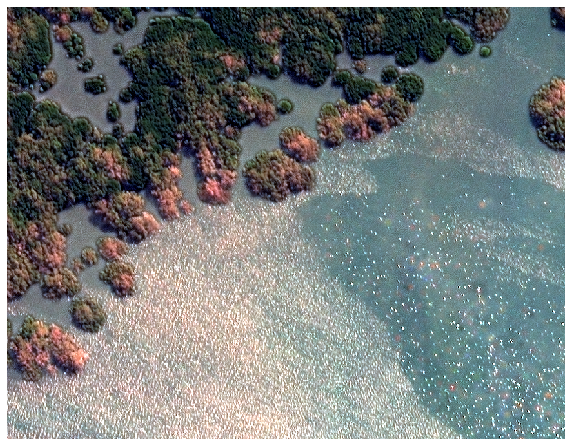

In [82]:
print("World View image taken on {}".format( image.metadata["image"]["acquisitionDate"]))
print('Time difference between highes water and image is: ', time_image - t_max)

image.plot(w=10, h=10)

# Transform dask array to array
image_array = image.read()
data = image_array

In [83]:
time_image_str = time_image.strftime('%Y-%m-%d_%H:%M')

In [84]:
x,y = geom.centroid.xy

# UTM zone and EPSG code calculator
zone_cal = round((183+x[0])/6,0)
EPSG = 32700-round((45+y[0])/90,0)*100+round((183+x[0])/6,0)
UTM_EPSG_code ='EPSG:%i'  % (EPSG)

UTM_EPSG_code

'EPSG:32750'

In [87]:
name = 'test_water'

path = "../../data/rasters_waterbodies_osm/{}_pansharpen_{}_{}.tif".format(name,time_image_str,image_id)
proj = UTM_EPSG_code

path

'../../data/rasters_waterbodies_osm/test_water_pansharpen_2019-08-01_02:45_1030010096902A00.tif'

In [88]:
tif = image.geotiff(
    path = path, 
    proj = proj
                 )

# plot cleaning steps

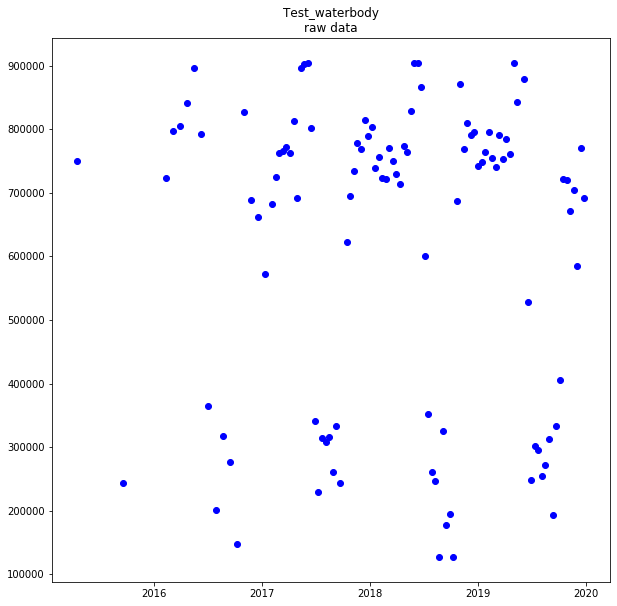

In [15]:
# and visually
plt.figure(figsize= (10,10))
plt.plot(df.DateTime,df.size_water, 'bo')
plt.title(name + '\nraw data')
plt.show()

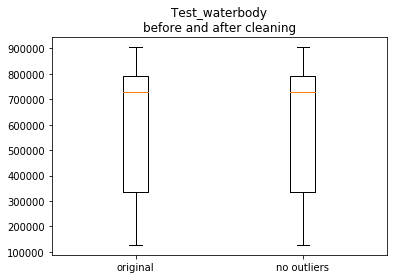

In [16]:
plt.boxplot([value_mask_size, df.size_water], labels=['original', 'no outliers'])
plt.title(name + '\nbefore and after cleaning')
plt.show()

# Get polygon?

In [ ]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
%matplotlib inline

catalog_id = env.inputs.get('catalog_id', '103001009A066100')
bbox = env.inputs.get('bbox', '106.94986581802368, -6.173472986688516, 106.9567108154297, -6.163147599856556')

image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")))
image.plot(w=10, h=10)

In [65]:
# set water body of interest
waterbody_i = 4

#set waterthreshol
waterThreshold = -13; 

name = features[waterbody_i].getInfo()['properties']['name']

# apply buffer to area of interest
AOI_geometry = ee.FeatureCollection(features[waterbody_i]).map(buffer1k).geometry()


# apply functions to GEE


def waterfunction2(image):
  
    image2 = image  .reproject(crs ='EPSG:4326', scale = SCALE)\
                      .focal_mode()\
                      .focal_max(1).focal_min(1).focal_max(2)\
                      .reproject(crs ='EPSG:4326', scale = SCALE)
  
    # get pixels above the threshold
    water01 = image2.lt(-13)
    # mask those pixels from the image
    image = image.updateMask(water01)
    #  calculate pixelalreas
    area = ee.Image.pixelArea()
    waterArea = water01.multiply(area).rename('waterArea').toInt();
    #   add waterarea band to uitput
    image = image.addBands(waterArea)

    return image


# Get the SAR data from the Sentinel-1 collection.
S1 = ee.ImageCollection('COPERNICUS/S1_GRD')\
    .filter(ee.Filter.eq('instrumentMode', 'IW'))\
    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV'))\
    .filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))\
    .filterDate('2015-01-01', '2019-12-30')\
    .filterBounds(AOI_geometry)\
    .select(['VV']);

collection = S1.map(waterfunction2);



# im = ee.Image(collection.first())

In [68]:



# build geometry to measure
rect = ee.Geometry.Polygon(
        [[[106.81355510309686,-6.353704992127306],
        [106.82745967463006,-6.353704992127306],
        [106.82745967463006,-6.337667686800708],
        [106.81355510309686,-6.337667686800708],
        [106.81355510309686,-6.353704992127306]]])

# convert geometry to JSON format
rect_JSON = rect.getInfo()['coordinates']



im2 = collection.first().select('waterArea').clip(rect).reduceToVectors();

In [70]:
water_FeatureCollection = im2.getInfo()

In [75]:
water_FeatureCollection['features'][0]

{'type': 'Feature',
 'geometry': {'geodesic': False,
  'type': 'Polygon',
  'coordinates': [[[106.81381953211806, -6.353424678463727],
    [106.81390936364646, -6.353424678463727],
    [106.81390936364646, -6.353245015406904],
    [106.81381953211806, -6.353245015406904],
    [106.81381953211806, -6.353424678463727]]]},
 'id': '+1189046+70725',
 'properties': {'count': 2, 'label': 98}}

In [ ]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
%matplotlib inline

catalog_id = env.inputs.get('catalog_id', '10300100996F7F00')
bbox = env.inputs.get('bbox', '106.89491271972658, -6.123145498606175, 106.95945739746095, -6.0794491137500195')

image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")))
image.plot(w=10, h=10)

0  :  2
1  :  3
2  :  4
3  :  2
4  :  4
5  :  28
6  :  4
7  :  12
8  :  10
9  :  3
10  :  1174
11  :  76
12  :  1
13  :  1
14  :  297
15  :  2
16  :  3
17  :  25964


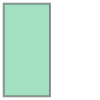

In [80]:
from shapely.geometry import shape

i = 0

for feature in water_FeatureCollection['features']:
    
    print(i, ' : ', feature['properties']['count'])
    
    i += 1



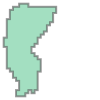

In [85]:
shape(water_FeatureCollection['features'][14]['geometry'])

In [42]:
# visualize resulting image
url=collection.first().getThumbUrl({
    'region':rect_JSON,
#     'min':-25,
#     'max':0,
#     'palette':['0784b5', '39ace7']
})

Image(url=url)

In [83]:
import folium

In [84]:
bbox_list_str = bbox.split(',')
bbox = [float(bbox_list_str[0]),float(bbox_list_str[1]),float(bbox_list_str[2]),float(bbox_list_str[3])]


NameError: name 'bbox' is not defined

In [ ]:
m = folium.Map([(bbox[1] + bbox[3])/2, (bbox[0] + bbox[2])/2],  zoom_start = 16, 
               tiles = 'https://{s}.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}{r}.png',
              attr='CartoDB', name = 'cartocdn')

folium.TileLayer('https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',attr='esri', name = 'esri Imagery').add_to(m)


# folium.raster_layers.ImageOverlay(
#     image=image.rgb(),
#     name='image 2017',
#     bounds=[[bbox[1], bbox[0]],[bbox[3],bbox[2]]],
#     opacity=1,
#     interactive=False,
#     cross_origin=False,
#     zindex=1, 
#     colormap=lambda x: (0,0,0, x)
# ).add_to(m)

# folium.raster_layers.ImageOverlay(
#     image=classification_plot,
#     name='Classification 2017',
#     bounds=[[bbox[1], bbox[0]],[bbox[3],bbox[2]]],
#     opacity=1,
#     interactive=False,
#     cross_origin=False,
#     zindex=1, 
#     colormap=lambda x: (0,x,x, 1)
# ).add_to(m)


folium.Choropleth(setu_wgs, name = 'Setu water delineation').add_to(m)

folium.Choropleth(setu_smooth, name = 'Smooth setu delineation').add_to(m)

folium.Choropleth(setu_poly, name = 'setu poly').add_to(m)

# f_smooth = [0.00001,0.00002,0.00003,0.00004,0.00006,0.00008]

# for i in f_smooth:
#     setu_smooth = setu_wgs.simplify(i)
#     folium.Choropleth(setu_smooth, name = 'smooth setu delineation'.format(i)).add_to(m)
# # 

# for point in range(0, len(locationlist)):
#     folium.Marker(locationlist[point], popup=df['ActualDBH'][point], group  = "Tree removals").add_to(m)

folium.LayerControl().add_to(m)

In [ ]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
%matplotlib inline

catalog_id = env.inputs.get('catalog_id', '1030010085B5FC00')
bbox = env.inputs.get('bbox', '106.89491271972658, -6.123145498606175, 106.95945739746095, -6.0794491137500195')

image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")))
image.plot(w=10, h=10)

In [ ]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
%matplotlib inline

catalog_id = env.inputs.get('catalog_id', '103001009A066100')
bbox = env.inputs.get('bbox', '106.89491271972658, -6.123145498606175, 106.95945739746095, -6.0794491137500195')

image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")))
image.plot(w=10, h=10)